In [ ]:
import pandas as pd


In [ ]:
pip install scikit-learn


In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving profitability.csv to profitability.csv


In [ ]:
df = pd.read_csv('/content/profitability.csv', encoding='cp1252', sep=';')

In [ ]:
df.head()

ProduitFk  CustomerFk  StoreFk  TransactionDate  StatmentDate TotalAssets  \
0          1        3470        1             5559          5559   381164,00   
1          2        4566        2            18750         18750   240319,00   
2          3        5756        3            38945         38945   294791,00   
3          4        2350        4             9235          9235   190521,00   
4          5        3547        5             5628          5628   425666,00   

  TotalLiabilities     Equity    Budget ActualExpenses   Amount  Quantity  \
0         59281,00  321883,00  28886,00       20784,00  4636,00         7   
1         17565,00  222754,00  42222,00       17879,00  4721,00         8   
2         35691,00  259100,00  24755,00       10480,00   507,00         6   
3         25545,00  164976,00  28149,00       14191,00  4863,00         3   
4         24040,00  401626,00  47232,00       19283,00   854,00         5   

  UnitPrice TotalPrice  
0     87,18     610,26  
1     89,93     719,44  
2     17,97     107,82  
3     38,71     116,13  
4     25,72     128,60

In [ ]:
cols_to_convert = ['TotalAssets', 'TotalLiabilities', 'Equity', 'Budget', 'ActualExpenses', 'Amount', 'UnitPrice', 'TotalPrice']

for col in cols_to_convert:
    df[col] = df[col].astype(str)  # Convertir en string pour éviter les erreurs
    df[col] = df[col].str.replace(',', '', regex=True)  # Supprimer les virgules
    df[col] = df[col].str.replace('[^0-9.-]', '', regex=True)  # Supprimer tout sauf chiffres et points
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir en float


In [ ]:
print(df.isna().sum())  # Voir s'il reste des valeurs NaN

ProduitFk           0
CustomerFk          0
StoreFk             0
TransactionDate     0
StatmentDate        0
TotalAssets         0
TotalLiabilities    0
Equity              0
Budget              0
ActualExpenses      0
Amount              0
Quantity            0
UnitPrice           0
TotalPrice          0
dtype: int64


In [ ]:
# Sélectionner les features pour le clustering
features = df[['Amount', 'TotalPrice']]


In [ ]:
# Standardiser les features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Déterminer le nombre optimal de clusters avec la méthode du coude
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

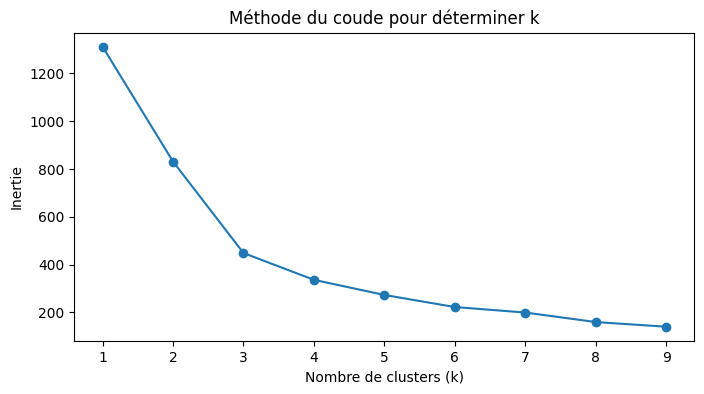

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode du coude pour déterminer k")
plt.show()

In [ ]:

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

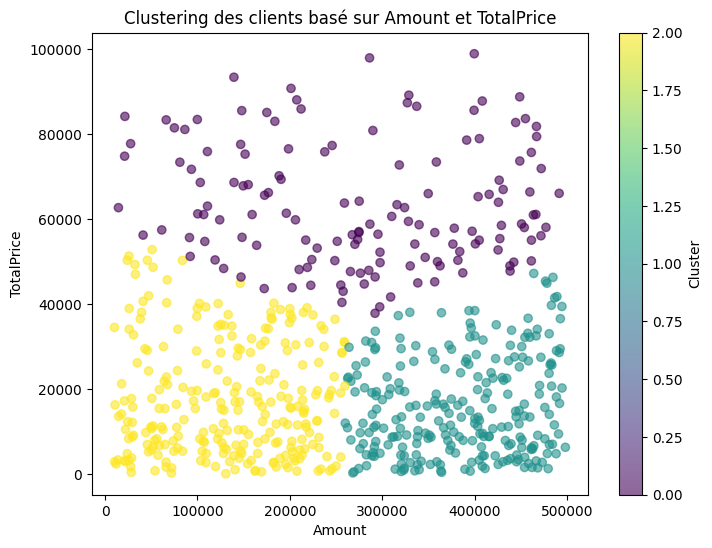

Cluster
2    261
1    252
0    143
Name: count, dtype: int64


In [ ]:
# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Amount'], df['TotalPrice'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Amount')
plt.ylabel('TotalPrice')
plt.title('Clustering des clients basé sur Amount et TotalPrice')
plt.colorbar(label='Cluster')
plt.show()

# Afficher la répartition des clients par cluster
print(df['Cluster'].value_counts())

In [ ]:
df.groupby('Cluster')[['Amount', 'TotalPrice']].mean()


Amount    TotalPrice
Cluster                             
0        278367.832168  63224.622378
1        385850.793651  15949.119048
2        133895.402299  17680.605364

In [ ]:
import pandas as pd

# Créer un DataFrame avec les résultats des clusters et leur interprétation
cluster_interpretation = {
    "Cluster": [0, 1, 2],
    "Interprétation": [
        "Client régulier",
        "Client en gros.",
        "Client occasionnel"
    ]
}

# Créer un DataFrame à partir du dictionnaire
df_interpretation = pd.DataFrame(cluster_interpretation)

# Afficher l'interprétation
df_interpretation


Cluster      Interprétation
0        0     Client régulier
1        1     Client en gros.
2        2  Client occasionnel

In [ ]:
# Ajouter la colonne "Type" en fonction du cluster
df['Type'] = df['Cluster'].map(cluster_interpretation)


In [ ]:
df.head()

ProduitFk  CustomerFk  StoreFk  TransactionDate  StatmentDate  TotalAssets  \
0          1        3470        1             5559          5559     38116400   
1          2        4566        2            18750         18750     24031900   
2          3        5756        3            38945         38945     29479100   
3          4        2350        4             9235          9235     19052100   
4          5        3547        5             5628          5628     42566600   

   TotalLiabilities    Equity   Budget  ActualExpenses  Amount  Quantity  \
0           5928100  32188300  2888600         2078400  463600         7   
1           1756500  22275400  4222200         1787900  472100         8   
2           3569100  25910000  2475500         1048000   50700         6   
3           2554500  16497600  2814900         1419100  486300         3   
4           2404000  40162600  4723200         1928300   85400         5   

   UnitPrice  TotalPrice  Cluster Type  
0       8718       61026        0  NaN  
1       8993       71944        0  NaN  
2       1797       10782        2  NaN  
3       3871       11613        1  NaN  
4       2572       12860        2  NaN

In [ ]:
import joblib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supposons que tu as déjà ces variables :
# features = df[['Amount', 'TotalPrice']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[['Amount', 'TotalPrice']])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)




In [ ]:
# Dictionnaire d'interprétation des clusters
interpretation = {
    0: "Client régulier",
    1: "Client en gros",
    2: "Client occasionnel"
}

# Ajouter la colonne Type
df['Type'] =df['Cluster'].map(interpretation)


In [ ]:
df.to_csv('kmeans_clusters.csv', index=False)
from google.colab import files
files.download('kmeans_clusters.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

ProduitFk  CustomerFk  StoreFk  TransactionDate  StatmentDate  TotalAssets  \
0          1        3470        1             5559          5559     38116400   
1          2        4566        2            18750         18750     24031900   
2          3        5756        3            38945         38945     29479100   
3          4        2350        4             9235          9235     19052100   
4          5        3547        5             5628          5628     42566600   

   TotalLiabilities    Equity   Budget  ActualExpenses  Amount  Quantity  \
0           5928100  32188300  2888600         2078400  463600         7   
1           1756500  22275400  4222200         1787900  472100         8   
2           3569100  25910000  2475500         1048000   50700         6   
3           2554500  16497600  2814900         1419100  486300         3   
4           2404000  40162600  4723200         1928300   85400         5   

   UnitPrice  TotalPrice  Cluster                Type  
0       8718       61026        0     Client régulier  
1       8993       71944        0     Client régulier  
2       1797       10782        2  Client occasionnel  
3       3871       11613        1      Client en gros  
4       2572       12860        2  Client occasionnel

In [ ]:
# Sauvegarder et télécharger le fichier
df.to_csv('kmeans_clusters.csv', index=False)
from google.colab import files
files.download('kmeans_clusters.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CAH


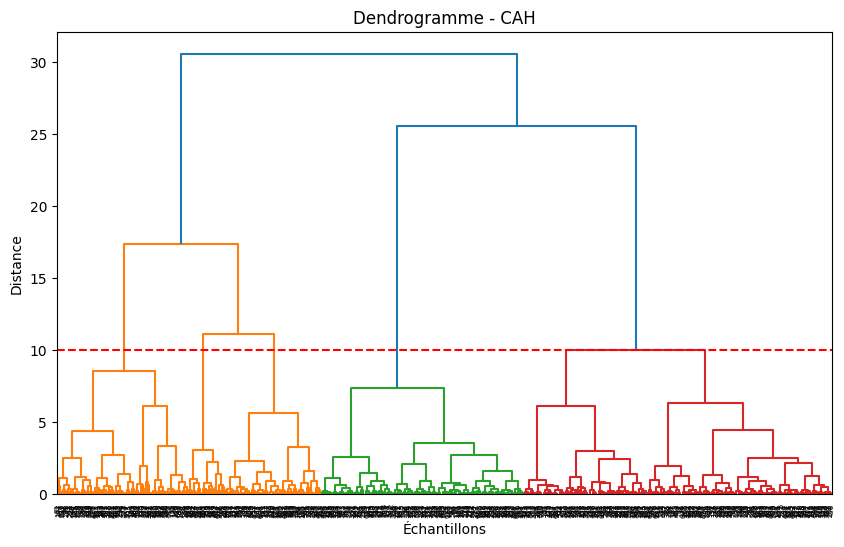

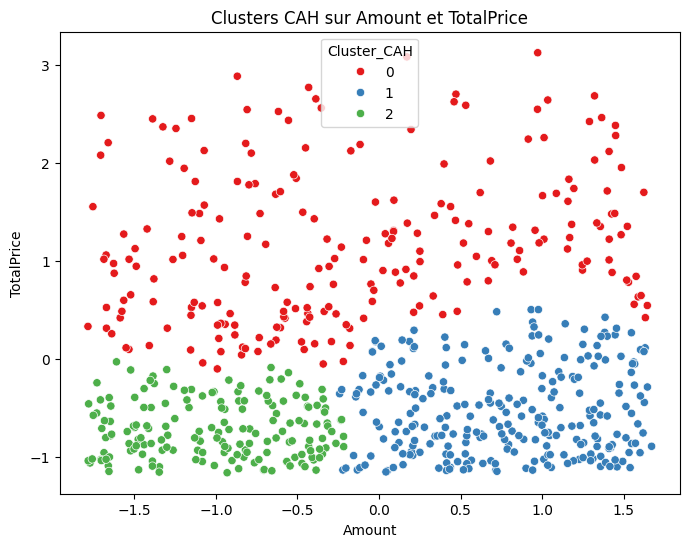

In [ ]:
# 1. Importer les bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# 2. Extraire les colonnes à utiliser
features = df[['Amount', 'TotalPrice']]

# 3. Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 4. Tracer le dendrogramme pour visualiser les fusions
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(features_scaled, method='ward'))
plt.title("Dendrogramme - CAH")
plt.xlabel("Échantillons")
plt.ylabel("Distance")
plt.axhline(y=10, color='r', linestyle='--')  # Ligne pour couper le dendrogramme (ajuste si besoin)
plt.show()

# 5. Appliquer le clustering hiérarchique (CAH) avec 3 clusters
cah = AgglomerativeClustering(n_clusters=3, linkage='ward')  # 'ward' implique l'utilisation de la distance euclidienne
labels_cah = cah.fit_predict(features_scaled)

# 6. Ajouter les résultats au DataFrame pour visualiser
features_df = pd.DataFrame(features_scaled, columns=['Amount', 'TotalPrice'])
features_df['Cluster_CAH'] = labels_cah

# 7. Visualisation des clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=features_df, x='Amount', y='TotalPrice', hue='Cluster_CAH', palette='Set1')
plt.title("Clusters CAH sur Amount et TotalPrice")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette pour K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(features_scaled)
sil_kmeans = silhouette_score(features_scaled, labels_kmeans)

# Silhouette pour CAH
cah = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_cah = cah.fit_predict(features_scaled)
sil_cah = silhouette_score(features_scaled, labels_cah)

print("Silhouette K-Means :", sil_kmeans)
print("Silhouette CAH     :", sil_cah)


Silhouette K-Means : 0.4398396992435329
Silhouette CAH     : 0.39071536367223153


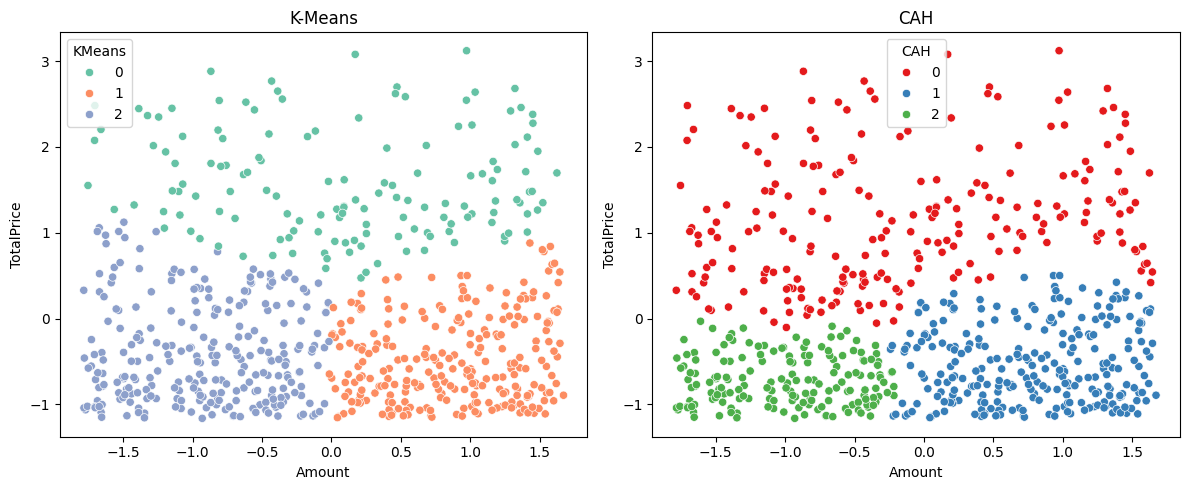

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajouter les deux labels dans un DataFrame
df_visu = pd.DataFrame(features_scaled, columns=['Amount', 'TotalPrice'])
df_visu['KMeans'] = labels_kmeans
df_visu['CAH'] = labels_cah

# Tracer
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_visu, x='Amount', y='TotalPrice', hue='KMeans', palette='Set2')
plt.title("K-Means")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_visu, x='Amount', y='TotalPrice', hue='CAH', palette='Set1')
plt.title("CAH")

plt.tight_layout()
plt.show()


GMM

```
# Ce texte est au format code
```



In [ ]:
# 1. Importer les bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score  # Ajout pour le score de silhouette

# 2. Extraire les colonnes à utiliser
# Remplacer 'df' par votre DataFrame si nécessaire
# Exemple : df = pd.read_csv('votre_fichier.csv')
features = df[['Amount', 'TotalPrice']]

# 3. Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 4. Appliquer le modèle GMM avec 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(features_scaled)

# 5. Calculer le score de silhouette
silhouette_avg = silhouette_score(features_scaled, labels_gmm)
print(f"Score de silhouette moyen : {silhouette_avg:.3f}")

# 6. Ajouter les résultats au DataFrame pour visualiser
features_df = pd.DataFrame(features_scaled, columns=['Amount', 'TotalPrice'])
features_df['Cluster_GMM'] = labels_gmm

# 7. Visualisation des clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=features_df, x='Amount', y='TotalPrice', hue='Cluster_GMM', palette='Set1')
plt.title(f"Clusters GMM sur Amount et TotalPrice (Silhouette Score: {silhouette_avg:.3f})")
plt.show()

# 8. Afficher les probabilités d'appartenance (facultatif)
proba = gmm.predict_proba(features_scaled)
print("Probabilités d'appartenance aux clusters (premiers 5 points) :")
print(pd.DataFrame(proba, columns=[f'Cluster_{i}' for i in range(3)]).head())

# 9. Compter les points dans chaque cluster
print("Nombre de points par cluster :")
print(features_df['Cluster_GMM'].value_counts())

# 10. Analyse optionnelle : BIC pour différents nombres de clusters
bic = []
n_components_range = range(1, 6)
for n in n_components_range:
    gmm_temp = GaussianMixture(n_components=n, random_state=42)
    gmm_temp.fit(features_scaled)
    bic.append(gmm_temp.bic(features_scaled))

plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bic, marker='o')
plt.title("BIC pour différents nombres de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("BIC")
plt.show()

Score de silhouette moyen : 0.361


Probabilités d'appartenance aux clusters (premiers 5 points) :
   Cluster_0     Cluster_1     Cluster_2
0   0.999974  2.644695e-05  2.559125e-13
1   1.000000  6.092705e-08  1.335023e-18
2   0.055801  1.192880e-07  9.441989e-01
3   0.033928  9.635927e-01  2.479735e-03
4   0.064029  1.640412e-06  9.359697e-01
Nombre de points par cluster :
Cluster_GMM
0    264
2    209
1    183
Name: count, dtype: int64
